## **Project Title:** Crime Rates in The Bronx
 This project is going to be based around crimes in the Bronx. Crime rates, and finding the safest and most dangerous neighborhoods, using data from NYC open data. It will be using many data visualization methods, such as bar graphs, time series graphs, and chloropeth maps.

# **Datasets:**

This project uses data from NYC OpenData, to gather criminal offense information from the years 2019-2021.

1.   NYC Hate Crime
2.   NYC Arrest Data Historic

1) The NYC Hate Crime Dataset contains infromation on reported/valid HateCrime offenses in the Bronx. Ranging from misdemeanors to Felony offenses, driven by hateful motives such as: Homophobia, Religion, Race, etc.

2) NYC Arrest Data Historic Dataset contains every arrest in NYC (we will be working with years from 2020-2021). This dataset includes much harsher crimes, and offenders' demographics such as sex and age.




# **Techniques:**
To explore and clean my datasets, I utilized the Pandas package. This allowed me to drop, concatenate, and cut the datasets down to only the Bronx.
Using matplotlib, seaborn, etc. I was able to create graphical visualizations such as: bar graphs, horizontal bar graphs, pie charts, line graphs, and tree-maps to make it user-viewer friendly, and easy to read the findings.

# **Resources/Datasets:**


*   https://data.cityofnewyork.us/Public-Safety/NYPD-Hate-Crimes/bqiq-cu78
*   https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u
* https://thecleverprogrammer.com/2020/05/26/san-francisco-crime-analysis-with-data-science/




In [1]:
#These will be the packages I will be using to visualize the data, and help clean/pre-process.
import pandas as pd
!pip install pandasql
import pandasql as psql #pandas sql has to be installed manually.
import numpy
import folium
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
!pip install squarify
import squarify
from wordcloud import WordCloud
import datetime



  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=7712d45735cfa636b386bd7cd817046fbd0ef3fa515825b28d0c553a6e404a13
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


# **We will be reading in the CSV files from NYC Open Data, storing them in variables to be able to manipulate the data**

In [2]:
from google.colab import files
uploaded = files.upload() #This will prompt you to upload the file. Use this for HATE CRIME

Saving NYPD_Hate_Crimes.csv to NYPD_Hate_Crimes.csv


In [3]:
from google.colab import files
uploaded_2 = files.upload() #This will prompt you to upload the file. Use this for HISTORIC DATA

Saving NYPD_ARRESTS_2020_.csv to NYPD_ARRESTS_2020_.csv


# **Now, put it into a data frame and print out the first few lines**

In [4]:
import io
 # This will be for HATE CRIMES. 
NYPD_HC_df = pd.read_csv(io.BytesIO(uploaded['NYPD_Hate_Crimes.csv']))
NYPD_HC_df.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201904612204817,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,02/08/2019,B31678218
1,201904812229517,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682790
2,201904812226617,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
3,201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
4,201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692174


In [5]:
import io
 # This will be for ARRESTS. 
NYPD_Arrests_df = pd.read_csv(io.BytesIO(uploaded_2['NYPD_ARRESTS_2020_.csv']))
NYPD_Arrests_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,206905372,01/02/2020,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,K,88,0,45-64,M,BLACK,990584,193614,40.698108,-73.977159,POINT (-73.97715882199996 40.69810842400005)
1,206906721,01/02/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200507,F,B,52,0,25-44,M,BLACK HISPANIC,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200004)
2,206900478,01/02/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200504,F,Q,103,6,18-24,F,BLACK,1037598,194471,40.700302,-73.807603,POINT (-73.80760338 40.70030215500003)
3,206906396,01/02/2020,750.0,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2053000,M,B,40,0,25-44,M,BLACK,1006075,236932,40.816981,-73.921152,POINT (-73.92115225499998 40.81698058400008)
4,206904239,01/02/2020,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,63,0,25-44,M,BLACK,1004550,164785,40.618958,-73.926879,POINT (-73.92687932899997 40.618958158000055)


# **Now, we will be cleaning the data. As you may have noticed, the data includes all boroughs, and we will only want the Bronx.**

The Bronx is one of the most dangerous Boroughs in New York City, known for high crime rates, and gang activity, so we will be focusing on getting an overview of crime in the Bronx




In [6]:
NYPD_HC_NEW = NYPD_HC_df.loc[NYPD_HC_df['County']=="BRONX"] 
NYPD_HC_NEW

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201904612204817,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,02/08/2019,B31678218
1,201904812229517,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682790
2,201904812226617,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
3,201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
4,201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,202105012237217,2021,4,04/26/2021,50,PATROL BORO BRONX,BRONX,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1043,202105012242417,2021,4,04/29/2021,50,PATROL BORO BRONX,BRONX,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1044,202105012246017,2021,4,05/01/2021,50,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1045,202105012266317,2021,5,05/15/2021,50,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


In [7]:
NYPD_ARREST_NEW = NYPD_Arrests_df.loc[NYPD_Arrests_df['ARREST_BORO']=='B']
NYPD_ARREST_NEW


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
1,206906721,01/02/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200507,F,B,52,0,25-44,M,BLACK HISPANIC,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200004)
3,206906396,01/02/2020,750.0,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2053000,M,B,40,0,25-44,M,BLACK,1006075,236932,40.816981,-73.921152,POINT (-73.92115225499998 40.81698058400008)
13,206898853,01/02/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,43,0,25-44,M,BLACK,1017854,240245,40.826037,-73.878581,POINT (-73.87858062599996 40.82603687200003)
18,206907335,01/02/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,B,42,0,45-64,F,BLACK,1014901,243467,40.834891,-73.889236,POINT (-73.88923592399993 40.83489107400005)
19,206903901,01/02/2020,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,B,52,0,18-24,M,WHITE HISPANIC,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139897,222466650,12/31/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,F,WHITE HISPANIC,1007627,245101,40.839398,-73.915517,POINT (-73.91551674099996 40.83939817900006)
139900,222444437,12/31/2020,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,B,46,0,45-64,M,WHITE HISPANIC,1009325,251558,40.857116,-73.909356,POINT (-73.90935600999995 40.85711607400003)
139901,222469303,12/31/2020,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,B,40,0,18-24,M,BLACK,1006611,233503,40.807568,-73.919227,POINT (-73.91922722299995 40.80756759500007)
139904,222479762,12/31/2020,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,48,0,18-24,M,WHITE HISPANIC,1012580,249751,40.852147,-73.897597,POINT (-73.89759691999996 40.85214655600004)


#**Analysis/Visualization of Hate Crimes dataset** 

**There are 4 major categories for the description of Hate Crimes:**

1.   Felony (Over 500 offenses committed)
2.   Misdemeanor (Over 600 offenses committed)
3.   Violation (Less than 50 offenses committed)
4.   Investigation (Barely any offenses committed)
**The above is for the original Hate Crime Dataset, using matplotlib, we will generate a graph showing the Bronx only**




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


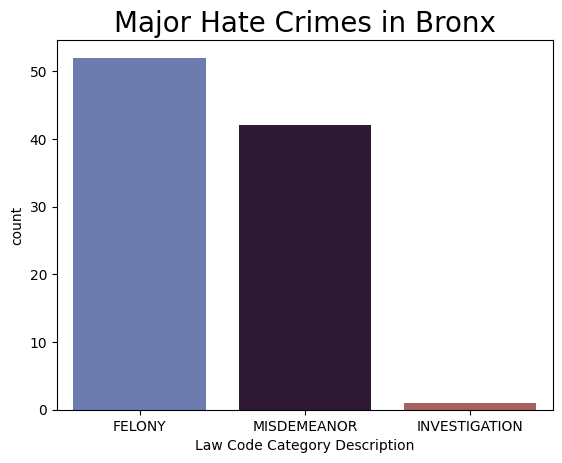

In [8]:

#THIS WILL BE FOR THE HATE CRIME DF. NYPD_HC_DF
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('default')

sns.countplot(NYPD_HC_NEW['Law Code Category Description'], palette = 'twilight')

plt.title('Major Hate Crimes in Bronx', fontweight = 30, fontsize = 20)
plt.show()

**Hate Crime Offense Categories describe what the victim was attacked for, we will look closer into what category is the most common.**

Bias Motive, details the exact reason why the victim was targeted. Using a tree-map, we will show common bias motives the assaulter had.



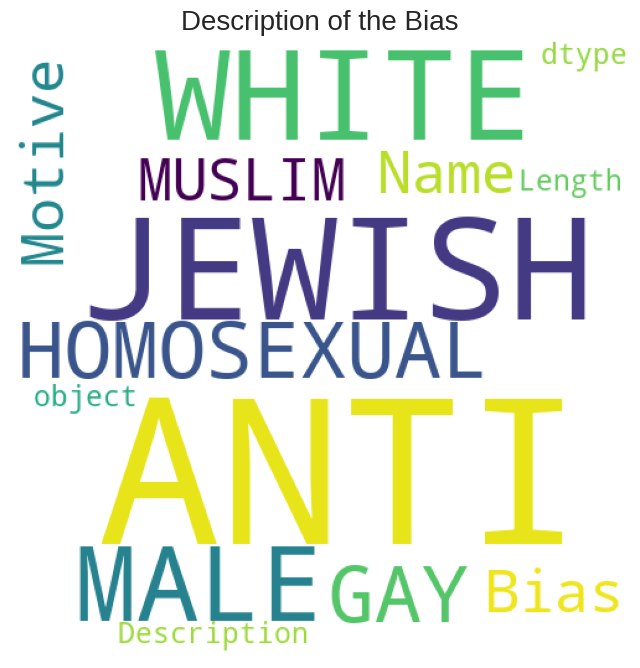

In [61]:
#Print out Offense Catgeory of all Hate Crimes.
plt.rcParams['figure.figsize'] = (8, 10)
plt.style.use('fast')

tree = WordCloud(background_color = 'white', width = 500, height = 500).generate(str(NYPD_HC_NEW['Bias Motive Description']))
plt.title('Description of the Bias', fontsize = 20)

plt.imshow(tree)
plt.axis('off')
plt.show()

**Crime Offense categories can range from: Religious offenses, Race,
Sexual Orientation, Age, Disabilites, etc.**

From the PieChart below, we can see that Religious based hate crimes make up approximately 50% of all hate crimes in the bronx, with Race being the next big hate crime offense. Offenses that deal with age, or disability are very rare.




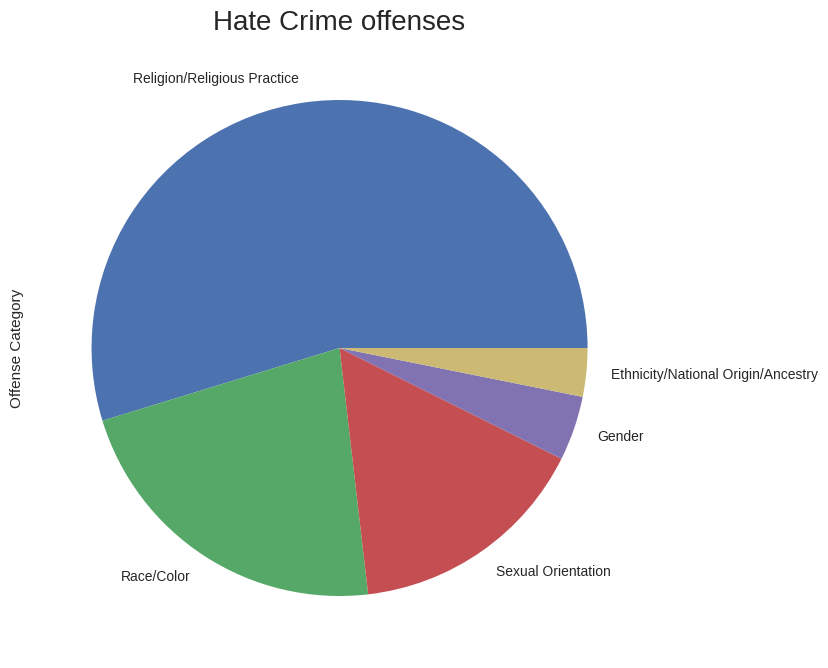

In [10]:
plt.style.use('seaborn')
NYPD_HC_NEW['Offense Category'].value_counts().plot.pie(figsize = (8, 9), explode =None)

plt.title('Hate Crime offenses',fontsize = 20)
plt.show()

**In the Bronx Hate Crime Dataset, there are 12 precincts. It is important to show which precincts have the most occurences of hate crimes (Not only for hate crimes, but for future use in this project as well).**


In [11]:
NYPD_HC_NEW.rename(columns = {'Complaint Precinct Code':'Precinct'}, inplace = True)

t = NYPD_HC_NEW.Precinct.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reset_index()
table.rename({'index': 'Precinct'}, axis='columns', inplace=True)

table

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Precinct,Count
0,50,21
1,48,13
2,44,12
3,40,12
4,46,7
5,45,7
6,42,6
7,52,4
8,43,4
9,49,3


# **Analysis/Visualization of Historic Arrest Dataset**

Unlike the Hate Crimes dataset, the Arrest Data set gives us more information on much harsher crimes in the Bronx; it gives us insights on the sex of the perpetrator, more detailed category descriptions, and age.
**Let's create a Tree Map with the top 10 offenses**

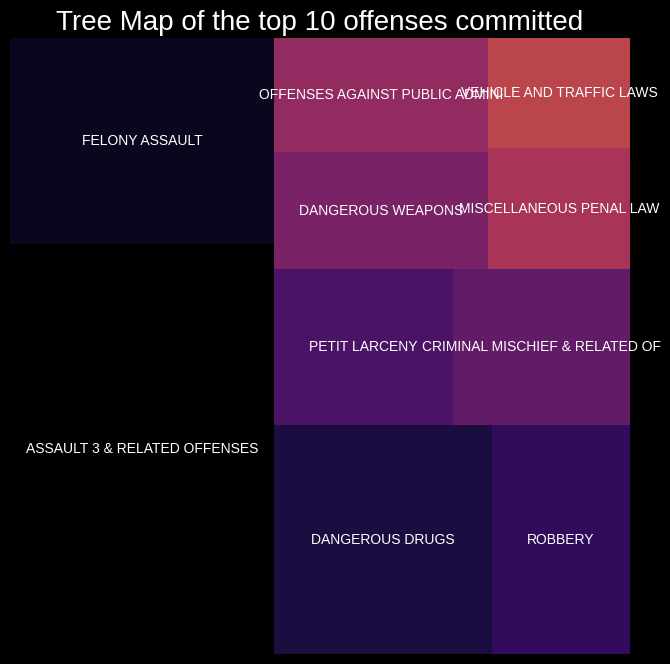

In [63]:
y = NYPD_ARREST_NEW['OFNS_DESC'].value_counts().head(10)
    
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('dark_background')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map of the top 10 offenses committed', fontsize = 20)

plt.axis('off')
plt.show()

Using the Tree Map , we can see the top 10 most common offenses, now lets graph this to be able to more accurately see the count of each offense

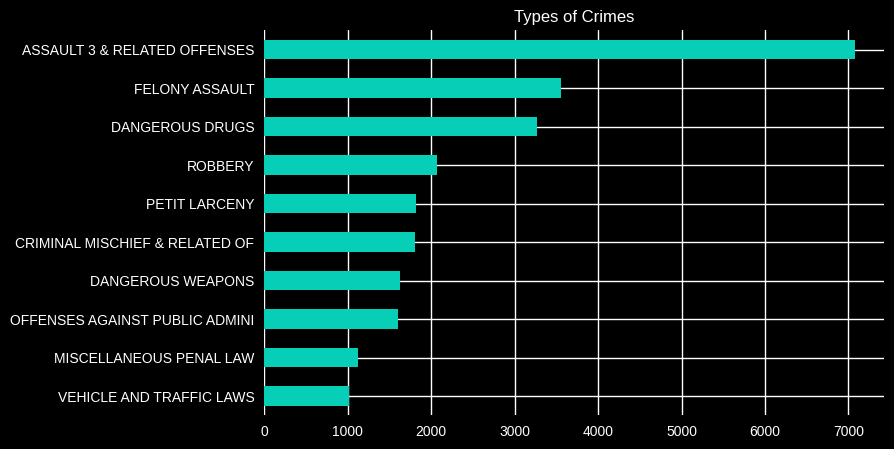

In [42]:
NYPD_ARREST_NEW.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes", color = "#06ceb7")

We can see that Assault 3 (With intent to cause physical injury to another person, he causes such injury to such person or to a third person) is the most common, with over 6000 counts.
Felony Assault follows up with over 3000, along with Dangerous Drugs

**Now, lets compare the perpetrators by gender, Which gender makes up the most crime?**

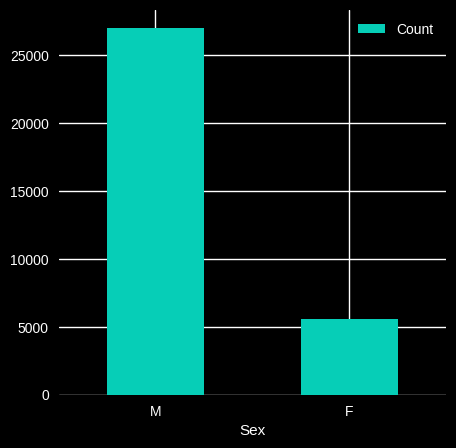

In [14]:
t_2 = NYPD_ARREST_NEW.PERP_SEX.value_counts()
table_2 = pd.DataFrame(data=t_2.values, index=t_2.index, columns=['Count'])

table_2 = table_2.reset_index()
table_2.rename({'index': 'Sex'}, axis='columns', inplace=True)

table_2
plt.style.use('dark_background')
table_2.plot.bar(x='Sex', y='Count', figsize=(5, 5), rot = 0, color = {"#06ceb7"})

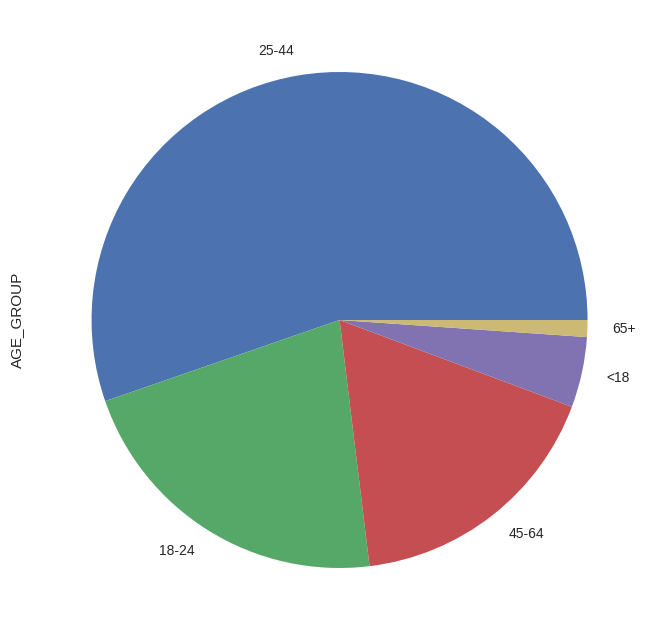

In [57]:


t_5 = NYPD_ARREST_NEW.AGE_GROUP.value_counts()
table_5 = pd.DataFrame(data=t_5.values, index=t_5.index, columns=['Count'])

table_5 = table_5.reset_index()
table_5.rename({'index': 'Age'}, axis='columns', inplace=True)

agedf = NYPD_ARREST_NEW['AGE_GROUP'].value_counts().plot.pie(figsize = (8, 9), explode =None)
plt.show()

In regards to gender and crime, Males make up over 25,000 of the offenses committed in the Bronx, and Females with just over 5,000. Males are 5x MORE dangerous than the Females.

**Let us now visualize the most dangerous days/months in which crimes take place.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


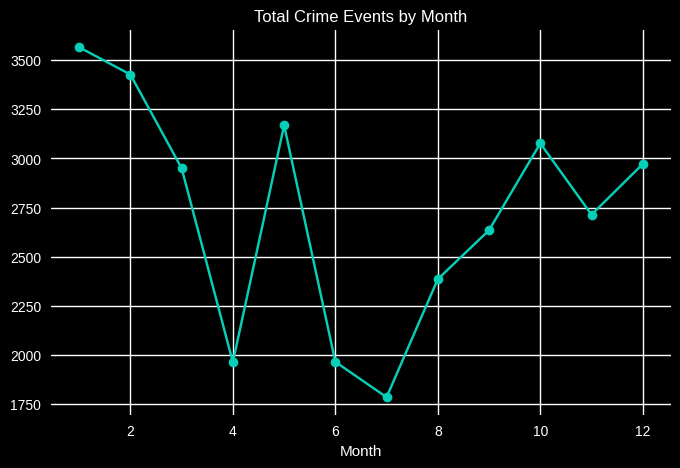

In [43]:

NYPD_ARREST_NEW['ARREST_DATE'] = pd.to_datetime(NYPD_ARREST_NEW['ARREST_DATE'])
NYPD_ARREST_NEW['Month'] = NYPD_ARREST_NEW['ARREST_DATE'].dt.month

NYPD_ARREST_NEW.groupby('Month').size().plot(kind = 'line', title ='Total Crime Events by Month', color = '#06ceb7', xlabel = 'Month',rot=0, marker = 'o')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


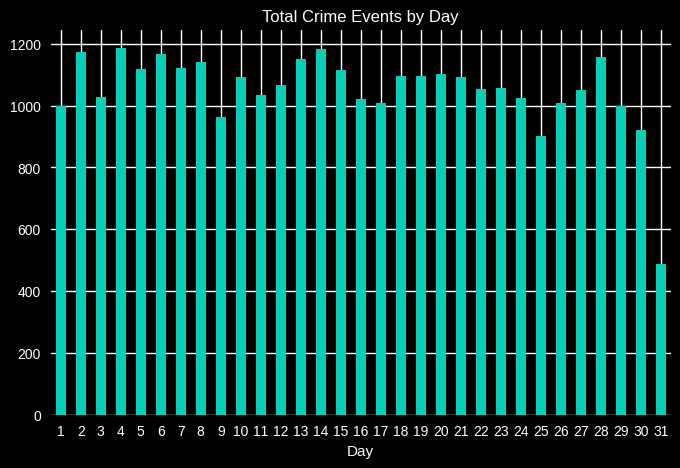

In [41]:
NYPD_ARREST_NEW['ARREST_DATE'] = pd.to_datetime(NYPD_ARREST_NEW['ARREST_DATE'])
NYPD_ARREST_NEW['Year'] = NYPD_ARREST_NEW['ARREST_DATE'].dt.day

NYPD_ARREST_NEW.groupby('Year').size().plot(kind = 'bar', title ='Total Crime Events by Day', color = '#06ceb7', xlabel = 'Day',rot=0)

From this Graph of Crime per month, we can see that January is the month that is most dangerous, we can draw conclusions that go deeper in the Conclusion of the Project coming up.

# **Finally, lets analyze the precincts where crime most occurs. We will then use the table from Hate Crime Analysis, along with Arrest Data Analysis to help us see which precincts have the highest crime, and which precincts are the safest..**

In [16]:
NYPD_ARREST_NEW.rename(columns = {'ARREST_PRECINCT':'Precinct'}, inplace = True)

t_3 = NYPD_ARREST_NEW.Precinct.value_counts()

table_3 = pd.DataFrame(data=t_3.values, index=t_3.index, columns=['Count'])
table_3 = table_3.reset_index()
table_3.rename({'index': 'Precinct'}, axis='columns', inplace=True)

table_3

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Precinct,Count
0,40,4365
1,44,3794
2,46,3363
3,52,3179
4,43,3146
5,47,3130
6,42,2507
7,48,2481
8,41,2282
9,49,1816


In [17]:
 precinct_sum = NYPD_HC_NEW.Precinct.value_counts() + NYPD_ARREST_NEW.Precinct.value_counts()
 precinct_sum

40    4377.0
41    2285.0
42    2513.0
43    3150.0
44    3806.0
45    1448.0
46    3370.0
47    3133.0
48    2494.0
49    1819.0
50    1125.0
52    3183.0
73       NaN
Name: Precinct, dtype: float64

# **Conclusion/Findings:**

> Hate Crime Dataset Summary:

*   Hate Crime Felony offenses are the most common
*   Hate Crimes are based off bias motives such as; homophobia, muslim religion, age, skin color, etc.
*   Religion is the top motive for these offenses, Race and Sexual orientation also make up a good chunk











> Arrest Record Dataset Summary:


*   Males are the gender that committs the most crimes
*   People of age 25-44 make up ,more than 50% of the committed crimes, with age 65 being the least.
* January and February are the months with the most crime (The months following Christmas time). July is the month with the least committed crimes (Summer time, sun stays up longer compared to the months like December/January where the it gets darker quicker; easier to commit crimes)


> Precinct Safety


*   Precinct 40 is the most dangerous precint in the Bronx, 4,377 counts of criminal activity recorded.
*   Precinct 50 is the safest with 1,125 counts of crime committed.
*   We are more likely to be victims to a Male of age 24-44, with religion/race playing an important part of his motive for comitting crime
*   During the colder months (Quicker sun-sets) it is safer to stay inside, Crime counts are at their highest
*   Assault with intent to injure (Assault 3), Robbery, Felony Assault, Misdemenaor Hate Crimes (Maximum 1 year in prison) and drug crimes are the most common for arrests from 2020-2021, and most common for Hate Crime classification







